<a href="https://colab.research.google.com/github/Palak-bansal-26/Natural-Disaster-Prediction/blob/main/AvalanchePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, r2_score, mean_squared_error,classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [103]:
# Load the dataset
file_path = '/mnt/StevensPass-GraceLakes_4790_feet_2019.csv'
data = pd.read_csv(file_path)

data.head()

,Date/Time (PST),Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")"
0,25-06-2019 15:00,47.33,89.90,16.46,-7999.0
1,25-06-2019 14:00,53.80,69.82,10.02,-7999.0
2,25-06-2019 13:00,55.02,65.32,12.31,-7999.0
3,25-06-2019 12:00,56.62,54.77,11.77,-7999.0
4,25-06-2019 11:00,54.93,58.87,12.12,-7999.0


In [104]:
# Summary of missing values
missing_data_summary = data.isnull().sum()

# Display the cleaned data and the summary of missing values
data.head(), missing_data_summary

(    Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
 0  25-06-2019 15:00                47.33                  89.90   
 1  25-06-2019 14:00                53.80                  69.82   
 2  25-06-2019 13:00                55.02                  65.32   
 3  25-06-2019 12:00                56.62                  54.77   
 4  25-06-2019 11:00                54.93                  58.87   
 
    Total Snow Depth (")  Intermittent/Shot Snow (")  
 0                 16.46                     -7999.0  
 1                 10.02                     -7999.0  
 2                 12.31                     -7999.0  
 3                 11.77                     -7999.0  
 4                 12.12                     -7999.0  ,
 Date/Time (PST)               0
 Temperature (deg F)           0
 Relative Humidity (%)         0
 Total Snow Depth (")          0
 Intermittent/Shot Snow (")    0
 dtype: int64)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date/Time (PST)             4216 non-null   object 
 1   Temperature (deg F)         4216 non-null   float64
 2   Relative Humidity (%)       4216 non-null   float64
 3   Total Snow Depth (")        4216 non-null   float64
 4   Intermittent/Shot Snow (")  4216 non-null   float64
dtypes: float64(4), object(1)
memory usage: 164.8+ KB


In [106]:
data.describe()

,Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")"
count,4216.000000,4216.000000,4216.000000,4216.000000
mean,33.505245,81.600569,80.572843,-2095.653835
std,12.387051,19.137084,30.127579,3583.012850
min,3.482000,10.100000,1.696000,-7999.000000
25%,24.777500,71.257500,70.350000,-7999.000000
50%,32.870000,89.050000,89.900000,7.387000
75%,41.470000,96.100000,103.000000,35.260000
max,76.240000,100.000000,214.700000,514.600000


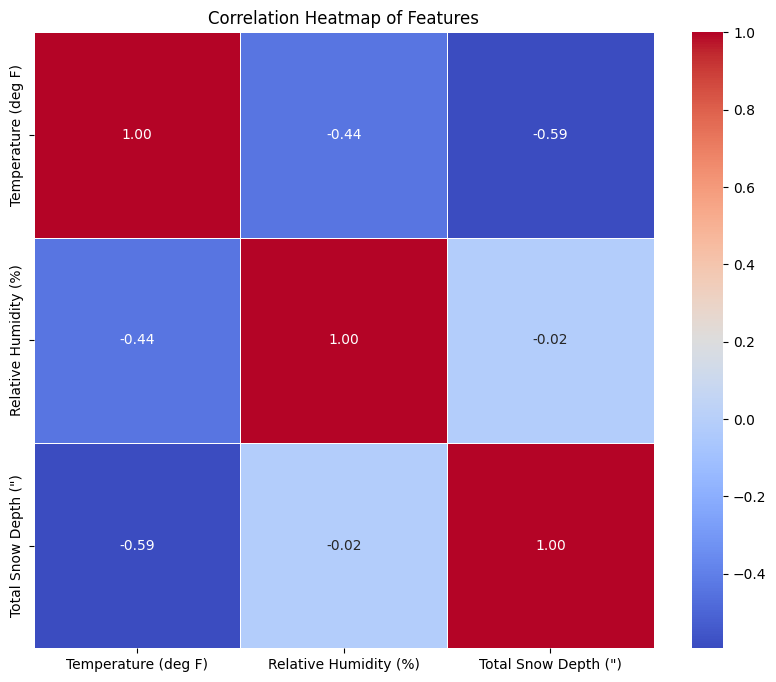

In [107]:
%matplotlib inline

correlation_matrix = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Features')
plt.show()

In [108]:
# Define thresholds for temperature and humidity to indicate avalanche risk
def temp_risk(temp):
    if temp < 15:
        return 3  # High risk
    elif temp <= 32:
        return 2  # Moderate risk
    else:
        return 1  # Low risk

def humidity_risk(humidity):
    if humidity > 80:
        return 3  # High risk
    elif humidity >= 50:
        return 2  # Moderate risk
    else:
        return 1  # Low risk
def snow_risk(snow_depth):
    if snow_depth > 10:
        return 3  # High risk
    elif snow_depth >= 5:
        return 2  # Moderate risk
    else:
        return 1  # Low risk
def avalanche_risk(row):
    total_risk = temp_risk(row['Temperature (deg F)']) + humidity_risk(row['Relative Humidity (%)']) + snow_risk(row['Total Snow Depth (")'])
    if total_risk > 6:
        return 1  # High risk
    else:
        return 0  # Low risk




In [109]:
# Apply the risk functions to the data
data['Temperature Risk'] = data['Temperature (deg F)'].apply(temp_risk)
data['Humidity Risk'] = data['Relative Humidity (%)'].apply(humidity_risk)
data['Snow Depth Risk'] = data['Total Snow Depth (")'].apply(snow_risk)


data['Avalanche Risk'] = data.apply(avalanche_risk, axis=1)



# Display the first few rows of the updated dataset
data.head()

,Date/Time (PST),Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")",Temperature Risk,Humidity Risk,Snow Depth Risk,Avalanche Risk
0,25-06-2019 15:00,47.33,89.90,16.46,-7999.0,1,3,3,1
1,25-06-2019 14:00,53.80,69.82,10.02,-7999.0,1,2,3,0
2,25-06-2019 13:00,55.02,65.32,12.31,-7999.0,1,2,3,0
3,25-06-2019 12:00,56.62,54.77,11.77,-7999.0,1,2,3,0
4,25-06-2019 11:00,54.93,58.87,12.12,-7999.0,1,2,3,0


In [110]:
# Select features and target variable
features = data[['Temperature (deg F)', 'Relative Humidity (%)', 'Total Snow Depth (")']]
target = data['Avalanche Risk']

# Standardize the features to ensure equal scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)




In [113]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)


In [114]:
# Train a Logistic Regression model
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [115]:
logmodel.score(X_test,y_test)

0.9407114624505929

In [116]:
# Train a Gradient Boosting model
gbmodel = GradientBoostingClassifier(random_state=42)
gbmodel.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [117]:
gbmodel.score(X_test,y_test)

0.9992094861660079

In [118]:
# Train a Random Forest model
rfmodel = RandomForestClassifier(random_state=42, n_estimators=100)
rfmodel.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [119]:
rfmodel.score(X_test,y_test)

0.9984189723320158

In [120]:

# Train an SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [121]:
svm_model.score(X_test,y_test)

0.9794466403162055

In [91]:

# Initialize the models
models = {
    'Logistic Regression': logmodel,
    'Gradient Boosting': gbmodel,
    'Random Forest': rfmodel,
    'Support Vector Classifier': svm_model
}



scores=[]

for name, model in models.items():
    model.fit(X_train,y_train)
    scores.append({
        'model': name,
        'accuracy': model.score(X_test,y_test)
    })



                           Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression        0.940711   0.948081  0.966628  0.957265  0.987618
Gradient Boosting          0.999209   0.998851  1.000000  0.999425  0.999997
Random Forest              0.998419   0.997704  1.000000  0.998851  1.000000
Support Vector Classifier  0.979447   0.981714  0.988493  0.985092  0.998663
                           R² Score       MSE
Logistic Regression        0.807693  0.041355
Gradient Boosting          0.996325  0.000790
Random Forest              0.991233  0.001885
Support Vector Classifier  0.936880  0.013574


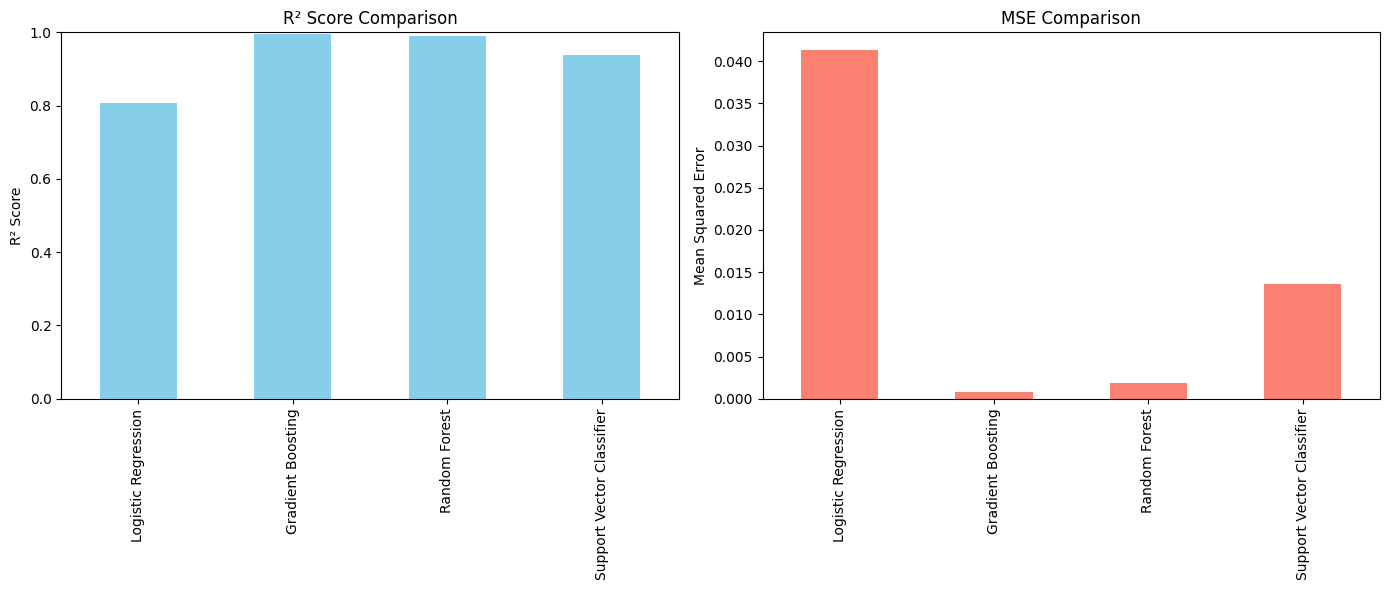

In [92]:

results = {}
regression_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

    # Calculate regression metrics based on predicted probabilities
    regression_metrics[name] = {
        'R² Score': r2_score(y_test, y_prob),
        'MSE': mean_squared_error(y_test, y_prob)
    }

# Display the comparative performance results for classification
results_df = pd.DataFrame(results).T
print(results_df)

# Display the regression metrics
regression_metrics_df = pd.DataFrame(regression_metrics).T
print(regression_metrics_df)

# Plot the regression metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for R² Score
regression_metrics_df['R² Score'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0, 1])

# Bar chart for MSE
regression_metrics_df['MSE'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()


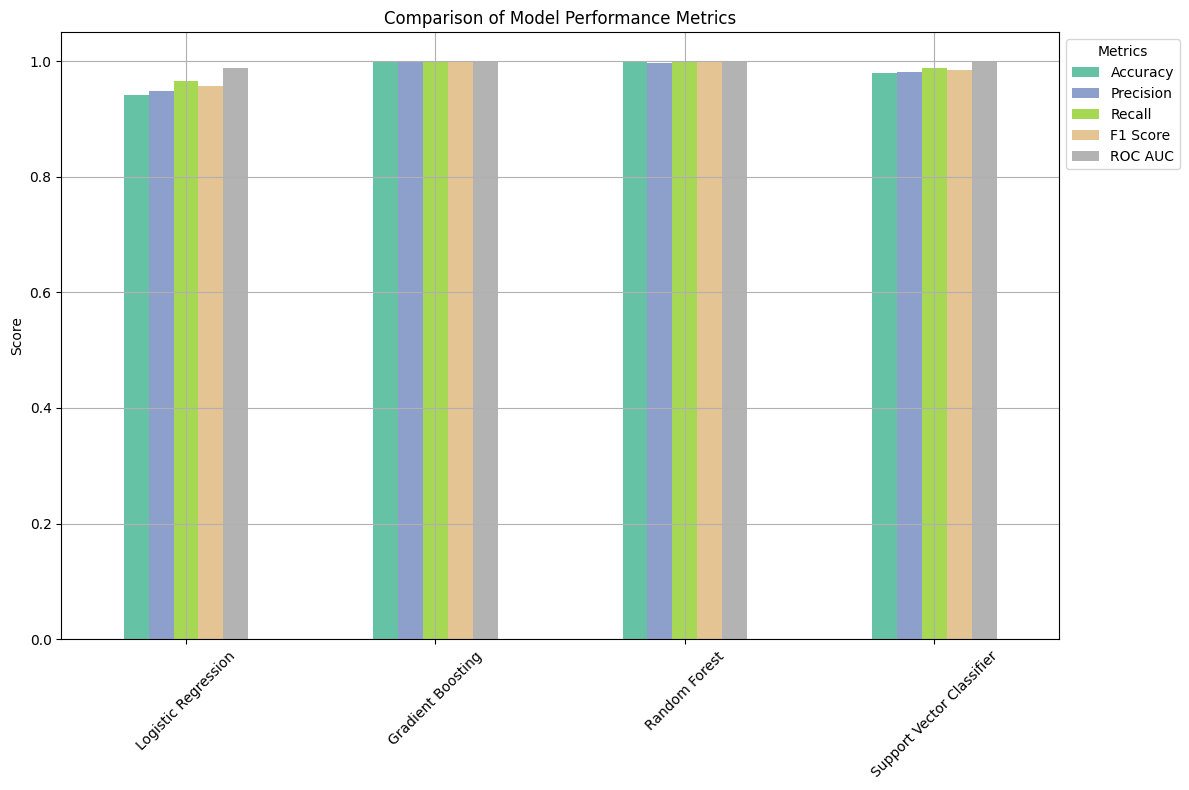

In [95]:


# Bar plot for each metric
results_df.plot(kind='bar', figsize=(12, 8), colormap='Set2')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()


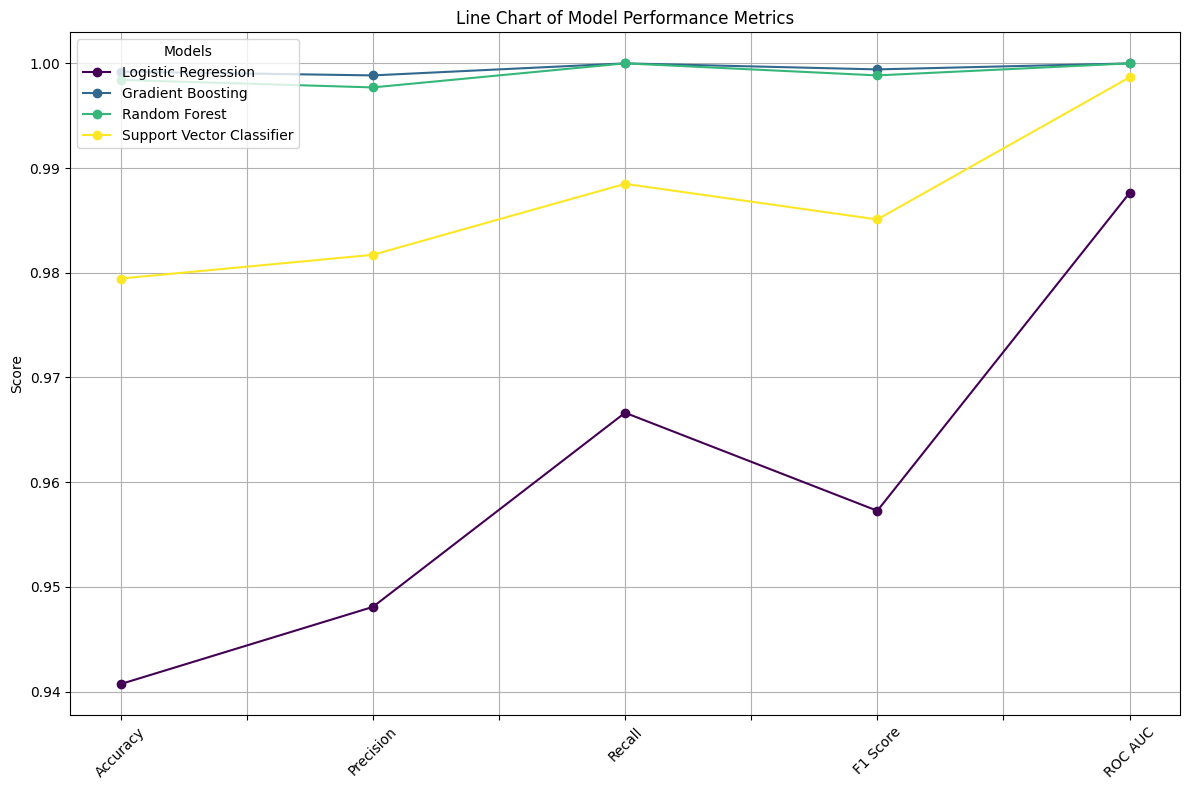

In [96]:
results_df.T.plot(kind='line', marker='o', figsize=(12, 8), colormap='viridis')
plt.title('Line Chart of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Models', loc='upper left')
plt.tight_layout()
plt.show()


